#  Принятие решений в бизнесе

**Описание проекта:**

Отдел маркетинга крупного интернет-магазина подготовил список гипотез для увеличения выручки.

 **Цель исследования:**

1) Приоритизировать гипотезы

2) Провести A/B-тест и проанализировать его результаты.

**Описание данных:**

Дано три датасета. hypothesis.csv хранит гипотезы с названием и информацией о показателях для принятия на их основе решения о их приоритезации, orders.csv — информацию о заказах, а visitors.csv — информацию о посетителях.

**1)  Структура hypothesis.csv:**
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**2) Структура orders.csv:**
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

**3) Структура visitors.csv:**
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Проект состоит из 4 частей:**

0. Загрузка данных, их обзор, предобработка и подготовка к анализу, проверка на непересечения групп А и В;

1. Приоритизация гипотез;

2. Анализ A/B-теста;

3. Общий вывод.


**_____________________________________________________________________________________________________________________________________________________________**

**0. Загрузим данные и подготовим их к анализу**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import defaultdict

In [ ]:
hypothesis=pd.read_csv('hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [ ]:
orders=pd.read_csv('orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [ ]:
visitors=pd.read_csv('visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Посмотрим общую информацию о таблицах

In [ ]:
display(hypothesis.head(2))
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Тут нужно изменить название колонок

In [ ]:
display(orders.head(2))
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Тут нужно переделать тип данных даты

In [ ]:
display(visitors.head(2))
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Тут нужно переделать тип данных даты

Исправим информацию в таблицах:

В hypothesis исправим буквы в названии колонок на маленькие

In [ ]:
hypothesis.columns=hypothesis.columns.str.lower()

In [ ]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Изменим тип данных в строке date на datetime

In [ ]:
orders['date']=pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [ ]:
visitors['date']=pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Избавимся от возможных дубликатов:

In [ ]:
hypothesis.duplicated().sum()

0

In [ ]:
hypothesis=hypothesis.dropna()
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 432.0+ bytes


In [ ]:
orders_copy = orders.copy()

In [ ]:
orders.duplicated().sum()

0

In [ ]:
orders=orders.drop_duplicates()
orders=orders.dropna()
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 56.1+ KB


In [ ]:
orders.duplicated().sum()

0

In [ ]:
visitors.duplicated().sum()

0

In [ ]:
visitors=visitors.drop_duplicates()
visitors=visitors.dropna()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.9+ KB


In [ ]:
visitors.duplicated().sum()

0

Проверим в таблице orders группы А и В на непересечение:

In [ ]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [ ]:
orders.pivot_table(index='visitorId',columns='group',values='transactionId',aggfunc='count')

group,A,B
visitorId,,
5114589,NaN,1.0
6958315,NaN,1.0
8300375,1.0,1.0
11685486,1.0,NaN
39475350,NaN,1.0
...,...,...
4266935830,1.0,1.0
4278982564,1.0,NaN
4279090005,NaN,1.0


In [ ]:
orders_group_users=orders.pivot_table(index='visitorId',columns='group',values='transactionId',aggfunc='count')
orders_group_users=orders_group_users.fillna(0)
orders_group_users['A+B']=orders_group_users['A']+orders_group_users['B']
orders_group_users

group,A,B,A+B
visitorId,,,
5114589,0.0,1.0,1.0
6958315,0.0,1.0,1.0
8300375,1.0,1.0,2.0
11685486,1.0,0.0,1.0
39475350,0.0,1.0,1.0
...,...,...,...
4266935830,1.0,1.0,2.0
4278982564,1.0,0.0,1.0
4279090005,0.0,1.0,1.0


В колонке "(A+B)_have"  укажем количество записей по каждому id посетителя сгруппированной по пользователям таблицы: если в этом столбце 1 - значит пользователь был либо в А либо В - то есть был только в одной группе. Если 2 значит пользователь в 2 группах и т.д.(хотя других значений, кроме 1 и 2 нет).

In [ ]:
orders_group_users['A_have']=(orders_group_users['A']>=1)*1
orders_group_users['B_have']=(orders_group_users['B']>=1)*1

orders_group_users['(A+B)_have']=orders_group_users['A_have']+orders_group_users['B_have']

print(orders_group_users['A+B'].unique())
print(orders_group_users['(A+B)_have'].unique())
print(orders_group_users[orders_group_users['(A+B)_have']==2].shape[0])
orders_group_users

[ 1.  2.  5.  3.  4.  8.  9. 11.]
[1 2]
58


group,A,B,A+B,A_have,B_have,(A+B)_have
visitorId,,,,,,
5114589,0.0,1.0,1.0,0,1,1
6958315,0.0,1.0,1.0,0,1,1
8300375,1.0,1.0,2.0,1,1,2
11685486,1.0,0.0,1.0,1,0,1
39475350,0.0,1.0,1.0,0,1,1
...,...,...,...,...,...,...
4266935830,1.0,1.0,2.0,1,1,2
4278982564,1.0,0.0,1.0,1,0,1
4279090005,0.0,1.0,1.0,0,1,1


Отберем id посетителей которые замечены при покупке в 2 группах:

In [ ]:
users_in_two_groups=orders_group_users[orders_group_users['(A+B)_have']==2][['A+B','(A+B)_have']].reset_index()
display(users_in_two_groups.head())
display(users_in_two_groups['visitorId'].head())
display(users_in_two_groups['visitorId'].count())

group,visitorId,A+B,(A+B)_have
0,8300375,2.0,2
1,199603092,5.0,2
2,232979603,2.0,2
3,237748145,5.0,2
4,276558944,2.0,2


0      8300375
1    199603092
2    232979603
3    237748145
4    276558944
Name: visitorId, dtype: int64

58

Получили список повторяющихся в 2 группах покупателей - освободим нашу выборку и наши группы от них

In [ ]:
for x in users_in_two_groups['visitorId']:
    orders=orders[orders['visitorId']!=x]
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


Проверка:

In [ ]:
orders_group_users1=orders.pivot_table(index='visitorId',columns='group',values='transactionId',aggfunc='count')
orders_group_users1=orders_group_users1.fillna(0)
orders_group_users1['A+B']=orders_group_users1['A']+orders_group_users1['B']
orders_group_users1

group,A,B,A+B
visitorId,,,
5114589,0.0,1.0,1.0
6958315,0.0,1.0,1.0
11685486,1.0,0.0,1.0
39475350,0.0,1.0,1.0
47206413,0.0,1.0,1.0
...,...,...,...
4259830713,1.0,0.0,1.0
4278982564,1.0,0.0,1.0
4279090005,0.0,1.0,1.0


In [ ]:
orders_group_users1['A_have']=(orders_group_users1['A']>=1)*1
orders_group_users1['B_have']=(orders_group_users1['B']>=1)*1

orders_group_users1['(A+B)_have']=orders_group_users1['A_have']+orders_group_users1['B_have']
print(orders_group_users1['A+B'].unique())
print(orders_group_users1['(A+B)_have'].unique())
print(orders_group_users1[orders_group_users1['(A+B)_have']==2].shape[0])
orders_group_users1


[1. 3. 2.]
[1]
0


group,A,B,A+B,A_have,B_have,(A+B)_have
visitorId,,,,,,
5114589,0.0,1.0,1.0,0,1,1
6958315,0.0,1.0,1.0,0,1,1
11685486,1.0,0.0,1.0,1,0,1
39475350,0.0,1.0,1.0,0,1,1
47206413,0.0,1.0,1.0,0,1,1
...,...,...,...,...,...,...
4259830713,1.0,0.0,1.0,1,0,1
4278982564,1.0,0.0,1.0,1,0,1
4279090005,0.0,1.0,1.0,0,1,1


Ниже пример более легкого способа проверки на пересечения

In [ ]:
intersection_users = orders_copy.groupby('visitorId', as_index=False)\
    .agg({'group': 'nunique'})\
    .query("group > 1")\
    ['visitorId']

print(f"Кол-во пересекающихся пользователей: {len(intersection_users)}")

Кол-во пересекающихся пользователей: 58


In [ ]:
orders_copy.groupby('visitorId', as_index=False).agg({'group': 'nunique'})

,visitorId,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [ ]:
orders_copy

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [ ]:
# ФИльтрация
orders_copy.loc[~orders_copy['visitorId'].isin(intersection_users)]

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


</b><br><code>~</code> - это взятие инверсии от фильтра (Было False, станет True и наоборот) - ниже пример</div>

In [ ]:
~orders_copy['visitorId'].isin(intersection_users)

0        True
1        True
2       False
3        True
4        True
        ...  
1192     True
1193     True
1194     True
1195    False
1196     True
Name: visitorId, Length: 1197, dtype: bool

In [ ]:
orders_copy['visitorId'].isin(intersection_users)

0       False
1       False
2        True
3       False
4       False
        ...  
1192    False
1193    False
1194    False
1195     True
1196    False
Name: visitorId, Length: 1197, dtype: bool

<hr style="border: 2px solid green;" />

**Вывод:**

**Подключил все основные и необходимые библиотеки. Выгрузил все данные и дал им названия hypothesis – гипотезы, orders -  заказы, visitors – посетители. Далее изучил данные: увидел, что названия колонок написаны не по стилю. В hypothesis исправил буквы в названии колонок на маленькие. Далее сделал проверку на пропуски и дубликаты – все три таблицы проверку прошли успешно – не было обнаружено ни дубликатов, ни пропусков.
Изучив типы данных начальных таблиц, увидел, что характеристики даты и времени стоят с типом данных object – исправил это на datetime и date. Также в таблице orders проверил группы А и В на непересечение - выяснилось - что есть 58 повторяющихся покупателей - удалил их данные из выборки, а также сделал проверку.**

## Часть 1. Приоритизация гипотез.

In [ ]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Применим фреймворк ICE для приоритизации гипотез. Так же тсортируем их по убыванию приоритета.

In [ ]:
number=list(range(1,hypothesis['hypothesis'].count()+1))
number

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
hypothesis=hypothesis.set_index([number])
hypothesis

,hypothesis,reach,impact,confidence,efforts
1,"Добавить два новых канала привлечения трафика,...",3,10,8,6
2,"Запустить собственную службу доставки, что сок...",2,5,4,10
3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
4,"Изменить структура категорий, что увеличит кон...",8,3,3,8
5,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
6,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
7,Показать на главной странице баннеры с актуаль...,5,3,8,3
8,Добавить форму подписки на все основные страни...,10,7,8,5
9,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5



$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [ ]:
hypothesis['ice']=hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
round(hypothesis.sort_values(by='ice',ascending=False),3)


,hypothesis,reach,impact,confidence,efforts,ice
9,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200
1,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333
8,Добавить форму подписки на все основные страни...,10,7,8,5,11.200
7,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000
3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000
2,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000
6,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333
4,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125
5,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000


**Можно приоритизировать в данной последовательности гипотезы**

In [ ]:
print('Можно приоритизировать в данной последовательности гипотезы:',round(hypothesis.sort_values(by='ice',ascending=False),3).index.values)



Можно приоритизировать в данной последовательности гипотезы: [9 1 8 7 3 2 6 4 5]


Можно разделить гипотезы на три группы по приоритету

In [ ]:
border_1_to_2=(hypothesis['ice'].max()-hypothesis['ice'].min())*2/3
border_1_to_2

10.133333333333333

In [ ]:
border_2_to_3=(hypothesis['ice'].max()-hypothesis['ice'].min())*1/3
border_2_to_3

5.066666666666666

Первая группа - лидеры:

In [ ]:
round(hypothesis.query('ice>@border_1_to_2').sort_values(by='ice',ascending=False),3)

,hypothesis,reach,impact,confidence,efforts,ice
9,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200
1,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333
8,Добавить форму подписки на все основные страни...,10,7,8,5,11.200


In [ ]:
print('Эти гипотезы можно признать лучшими:',round(hypothesis.query('ice>@border_1_to_2').sort_values(by='ice',ascending=False),3).index.values)


Эти гипотезы можно признать лучшими: [9 1 8]


Вторая группа - середнячки:

In [ ]:
round(hypothesis.query('@border_1_to_2>ice>@border_2_to_3').sort_values(by='ice',ascending=False),3)

,hypothesis,reach,impact,confidence,efforts,ice
7,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0
3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0


In [ ]:
print('Эти гипотезы будем проверять во вторую очередь:',round(hypothesis.query('@border_1_to_2>ice>@border_2_to_3').sort_values(by='ice',ascending=False),3).index.values)


Эти гипотезы будем проверять во вторую очередь: [7 3]


Третья группа - гипотезы менее интересные:

In [ ]:
round(hypothesis.query('ice<@border_2_to_3').sort_values(by='ice',ascending=False),3)

,hypothesis,reach,impact,confidence,efforts,ice
2,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000
6,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333
4,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125
5,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000


In [ ]:
print('Эти гипотезы будут рассмотрены в последнюю очередь:',round(hypothesis.query('ice<@border_2_to_3').sort_values(by='ice',ascending=False),3).index.values)


Эти гипотезы будут рассмотрены в последнюю очередь: [2 6 4 5]


Список с номерами гипотез и названиями:

In [ ]:
pd.set_option('display.max_colwidth',None)
hypothesis['hypothesis']

1              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
2                                       Запустить собственную службу доставки, что сократит срок доставки заказов
3    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
4             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
5                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
6                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
7            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
8                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
9                                                         Запустить акцию, дающую скидку

In [ ]:
pd.set_option('display.max_colwidth',50)

По показателю ICE приоритет нужно отдать гипотезам в следющем порядке: 9, 1, 8, 7, 3, 2, 6, 4, 5. Приоритет нужно отдать гипотезам: 9, 1, 8. В последнюю очередь можно проверить гипотезы : 2, 6, 4, 5. Первая гипотезы для проверки звучит так: (9)-"Запустить акцию, дающую скидку на товар в день рождения".

### Применим фреймворк RICE для приоритизации гипотез. Так же тсортируем их по убыванию приоритета.

In [ ]:
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice
1,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
2,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
4,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
5,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000
6,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
7,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
8,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
9,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000


In [ ]:
hypothesis['rice']=hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
round(hypothesis.sort_values(by='rice',ascending=False),3)


,hypothesis,reach,impact,confidence,efforts,ice,rice
8,Добавить форму подписки на все основные страни...,10,7,8,5,11.200,112.0
3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000,56.0
1,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333,40.0
7,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000,40.0
9,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200,16.2
4,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125,9.0
2,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000,4.0
6,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333,4.0
5,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000,3.0


Можно приоритизировать в данной последовательности гипотезы

In [ ]:
print('Можно приоритизировать в данной последовательности гипотезы:',round(hypothesis.sort_values(by='rice',ascending=False),3).index.values)



Можно приоритизировать в данной последовательности гипотезы: [8 3 1 7 9 4 2 6 5]


Можно разделить гипотезы на три группы по приоритету

In [ ]:
r_border_1_to_2=(hypothesis['rice'].max()-hypothesis['rice'].min())*2/3
r_border_1_to_2

72.66666666666667

In [ ]:
r_border_2_to_3=(hypothesis['rice'].max()-hypothesis['rice'].min())*1/3
r_border_2_to_3

36.333333333333336

Первая группа - лидеры:

In [ ]:
round(hypothesis.query('rice>@r_border_1_to_2').sort_values(by='rice',ascending=False),3)

,hypothesis,reach,impact,confidence,efforts,ice,rice
8,Добавить форму подписки на все основные страни...,10,7,8,5,11.2,112.0


In [ ]:
print('Эти гипотезы можно признать лучшими:',round(hypothesis.query('rice>@r_border_1_to_2').sort_values(by='rice',ascending=False),3).index.values)


Эти гипотезы можно признать лучшими: [8]


Вторая группа - середнячки:

In [ ]:
round(hypothesis.query('@r_border_1_to_2>ice>@border_2_to_3').sort_values(by='rice',ascending=False),3)

,hypothesis,reach,impact,confidence,efforts,ice,rice
8,Добавить форму подписки на все основные страни...,10,7,8,5,11.200,112.0
3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000,56.0
1,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333,40.0
7,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000,40.0
9,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200,16.2


In [ ]:
print('Эти гипотезы будем проверять во вторую очередь:',round(hypothesis.query('@r_border_1_to_2>rice>@r_border_2_to_3').sort_values(by='rice',ascending=False),3).index.values)


Эти гипотезы будем проверять во вторую очередь: [3 1 7]


Третья группа - гипотезы менее интересные:

In [ ]:
round(hypothesis.query('ice<@r_border_2_to_3').sort_values(by='rice',ascending=False),3)

,hypothesis,reach,impact,confidence,efforts,ice,rice
8,Добавить форму подписки на все основные страни...,10,7,8,5,11.200,112.0
3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000,56.0
1,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333,40.0
7,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000,40.0
9,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200,16.2
4,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125,9.0
2,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000,4.0
6,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333,4.0
5,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000,3.0


In [ ]:
print('Эти гипотезы будут рассмотрены в последнюю очередь:',round(hypothesis.query('rice<@r_border_2_to_3').sort_values(by='rice',ascending=False),3).index.values)


Эти гипотезы будут рассмотрены в последнюю очередь: [9 4 2 6 5]


Список с номерами гипотез и названиями:

In [ ]:
pd.set_option('display.max_colwidth',None)
hypothesis['hypothesis']


1              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
2                                       Запустить собственную службу доставки, что сократит срок доставки заказов
3    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
4             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
5                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
6                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
7            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
8                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
9                                                         Запустить акцию, дающую скидку

In [ ]:
pd.set_option('display.max_colwidth',50)

По показателю RICE приоритет нужно отдать гипотезам в следющем порядке: 8, 3, 1, 7, 9, 4, 2, 6, 5. Приоритет нужно отдать гипотезе: 8. В последнюю очередь можно проверить гипотезы : 9, 4, 2, 6, 5. Первая гипотезы для проверки звучит так: (8)-"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

### Выясним, как изменилась приоритизация гипотез при применении RICE вместо ICE.

In [ ]:
ice_priority=list(range(1,hypothesis['hypothesis'].count()+1))
ice_priority

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
hypothesis=hypothesis.sort_values(by='ice')
hypothesis['ice_priority']= ice_priority
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice,rice,ice_priority
5,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0,1
4,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0,2
6,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0,3
2,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0,4
3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0,5
7,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0,6
8,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0,7
1,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0,8
9,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2,9


In [ ]:
rice_priority=list(range(1,hypothesis['hypothesis'].count()+1))
rice_priority

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
hypothesis=hypothesis.sort_values(by='rice')
hypothesis['rice_priority']= rice_priority
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice,rice,ice_priority,rice_priority
5,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0,1,1
6,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0,3,2
2,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0,4,3
4,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0,2,4
9,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2,9,5
7,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0,6,6
1,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0,8,7
3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0,5,8
8,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0,7,9


In [ ]:
hypothesis=hypothesis.sort_index()
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice,rice,ice_priority,rice_priority
1,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0,8,7
2,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0,4,3
3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0,5,8
4,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0,2,4
5,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0,1,1
6,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0,3,2
7,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0,6,6
8,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0,7,9
9,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2,9,5


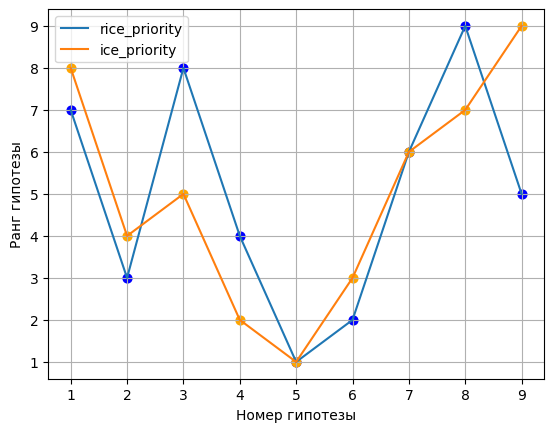

In [ ]:

plt.plot(hypothesis.index,hypothesis['rice_priority'],label='rice_priority')
plt.scatter(hypothesis.index,hypothesis['rice_priority'], color='blue', s=40, marker='o')
plt.plot(hypothesis.index,hypothesis['ice_priority'],label='ice_priority')
plt.scatter(hypothesis.index,hypothesis['ice_priority'], color='orange', s=40, marker='o')
plt.xlabel('Номер гипотезы')
plt.ylabel('Ранг гипотезы')
plt.legend()
plt.grid()

Можно построить подобный график но лучше использовать столбачую диаграму

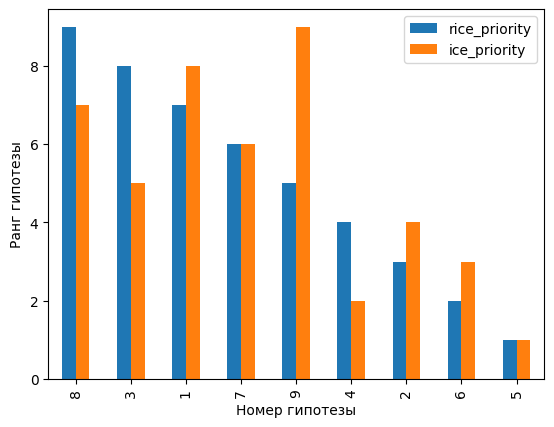

In [ ]:
hypothesis=hypothesis.sort_values(by=['rice','ice'],ascending=False)
hypothesis[['rice_priority','ice_priority']].plot(kind='bar')
plt.xlabel('Номер гипотезы')
plt.ylabel('Ранг гипотезы')
plt.legend()
plt.grid();

Как видно по графику и диаграме тренд похожий, но думаю лучше судить о приоритете гипотезы по RICE так как он учитывает больше параметров, а значит реальная точность выше.

In [ ]:
hypothesis=hypothesis.sort_values(by=['ice','rice'],ascending=False)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ice,rice,ice_priority,rice_priority
9,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2,9,5
1,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0,8,7
8,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0,7,9
7,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0,6,6
3,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0,5,8
2,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0,4,3
6,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0,3,2
4,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0,2,4
5,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0,1,1


In [ ]:
hypothesis['rice-ice']=hypothesis['rice_priority']-hypothesis['ice_priority']
hypothesis[['hypothesis','rice-ice']].sort_values(by=['rice-ice'])

,hypothesis,rice-ice
9,"Запустить акцию, дающую скидку на товар в день...",-4
1,"Добавить два новых канала привлечения трафика,...",-1
2,"Запустить собственную службу доставки, что сок...",-1
6,"Добавить страницу отзывов клиентов о магазине,...",-1
7,Показать на главной странице баннеры с актуаль...,0
5,"Изменить цвет фона главной страницы, чтобы уве...",0
8,Добавить форму подписки на все основные страни...,2
4,"Изменить структура категорий, что увеличит кон...",2
3,Добавить блоки рекомендаций товаров на сайт ин...,3


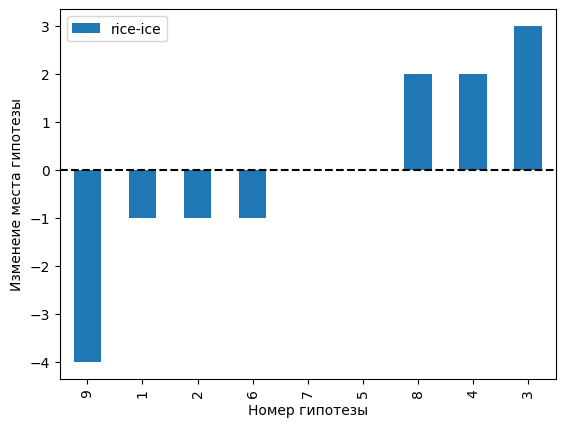

In [ ]:
hypothesis=hypothesis.sort_values(by=['rice-ice'])
hypothesis['rice-ice'].plot(kind='bar')
plt.xlabel('Номер гипотезы')
plt.ylabel('Изменеие места гипотезы')
plt.legend()
plt.axhline(y=0,linestyle='--', color='black')

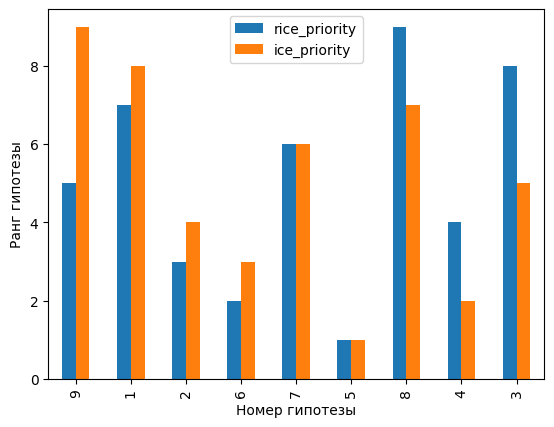

In [ ]:
hypothesis=hypothesis.sort_values(by=['rice-ice'])
hypothesis[['rice_priority','ice_priority']].plot(kind='bar')
plt.xlabel('Номер гипотезы')
plt.ylabel('Ранг гипотезы')
plt.legend()

In [ ]:
hypothesis=hypothesis.sort_values(by=['rice-ice'])
print('Как видно и по таблице и по графику падение места в ранге при переходе от ICE к RICE у гипотез с номерами:',hypothesis[hypothesis['rice-ice']<0].index.values)

Как видно и по таблице и по графику падение места в ранге при переходе от ICE к RICE у гипотез с номерами: [9 1 2 6]


Охват у гипотезы 9 очень маленький, что не удивительно - она актуально только в день рождения - соотвтественно и резултаты изменились на 4 места вниз - то есть гипотеза стала менее актуальной из-за малого охвата, что не учитывалось в ICE, но учитывается в RICE. У остальных гипотез наблюдается не такое сильно падение - всего лишь на 1 место.

In [ ]:
hypothesis=hypothesis.sort_values(by=['rice-ice'])
print('Как видно и по таблице и по графику при переходе от ICE к RICE место не изменилось у гипотез с номерами:',hypothesis[hypothesis['rice-ice']==0].index.values)

Как видно и по таблице и по графику при переходе от ICE к RICE место не изменилось у гипотез с номерами: [7 5]


In [ ]:
hypothesis=hypothesis.sort_values(by=['rice-ice'])
print('Как видно по таблице и по графику улучшение позиции произошло в ранге при переходе от ICE к RICE у гипотез с номерами:',hypothesis[hypothesis['rice-ice']>0].index.values)

Как видно по таблице и по графику улучшение позиции произошло в ранге при переходе от ICE к RICE у гипотез с номерами: [8 4 3]


Использование RICE помогло эти гипотезам вырваться вперед, а 8 и 3 гипотезам даже удалось занят 1 и 2 место соответственно.

**Вывод:**

**Если придерживаться метода ICE, последовательность проверки гипотез должна быть следующая: 9, 1, 8, 7, 3, 2, 6, 4, 5. Самую первую проверим 9 гипотезу.**
**Если придерживаться метода RICE, последовательность проверки гипотез должна быть следующая: 8, 3, 1, 7, 9, 4, 2, 6, 5. Самую первую проверим 8 гипотезу.**

**Как видно по графику и диаграме тренд похожий, но думаю лучше судить о приоритете гипотезы по RICE так как он учитывает больше параметров, а значит реальная точность выше.**
**Гипотеза 9 потеряла своих актульность при применении метода RICE из-за показателя Reach.**
**Гипотезы 8 и 3 стали самыми актаульными в проверке при применении метода RICE из-за показателя Reach.**

**  **

## Часть 2. Анализ A/B-теста

### Построим график кумулятивной выручки по группам

In [ ]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [ ]:
orders_date_a=orders.query('group=="A"').groupby('date',as_index=False).agg({'revenue':'sum','transactionId':'nunique','visitorId':'nunique'})
orders_date_b=orders.query('group=="B"').groupby('date',as_index=False).agg({'revenue':'sum','transactionId':'nunique','visitorId':'nunique'})
orders_date=orders_date_a.merge(orders_date_b, on='date')
orders_date.columns=['date' ,'revenue_a' ,'transactionId_a' ,'buyers_a' ,'revenue_b' ,'transactionId_b' ,'buyers_b']
orders_date

,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b
0,2019-08-01,142779,23,19,59758,17,17
1,2019-08-02,91602,19,18,162043,23,22
2,2019-08-03,112473,24,24,67049,14,14
3,2019-08-04,41176,11,11,96890,14,13
4,2019-08-05,86383,22,22,89908,21,21
5,2019-08-06,40919,15,12,214842,23,22
6,2019-08-07,123248,16,16,219164,23,23
7,2019-08-08,88639,14,14,150141,22,22
8,2019-08-09,134237,11,11,103166,19,19
9,2019-08-10,152275,15,15,105162,22,22


In [ ]:
ordersCummulative111=orders_date.set_index('date').cumsum(axis=0).reset_index()
display(ordersCummulative111.head())
display(ordersCummulative111.tail())

,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b
0,2019-08-01,142779,23,19,59758,17,17
1,2019-08-02,234381,42,37,221801,40,39
2,2019-08-03,346854,66,61,288850,54,53
3,2019-08-04,388030,77,72,385740,68,66
4,2019-08-05,474413,99,94,475648,89,87


,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b
26,2019-08-27,2940471,419,409,4579312,473,469
27,2019-08-28,3036933,434,424,4640510,495,491
28,2019-08-29,3233233,451,441,4746610,510,506
29,2019-08-30,3311413,460,449,4955833,531,527
30,2019-08-31,3364656,468,457,5068972,548,544


In [ ]:
ordersCummulative = orders_date.apply(
    lambda x: orders_date[orders_date['date'] <= x['date']].agg(
        {'date': 'max', 'revenue_a': 'sum', 'transactionId_a': 'sum', 'buyers_a': 'sum', 'revenue_b': 'sum', 'transactionId_b': 'sum', 'buyers_b': 'sum'}),axis=1)
ordersCummulative.tail()

,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b
26,2019-08-27,2940471,419,409,4579312,473,469
27,2019-08-28,3036933,434,424,4640510,495,491
28,2019-08-29,3233233,451,441,4746610,510,506
29,2019-08-30,3311413,460,449,4955833,531,527
30,2019-08-31,3364656,468,457,5068972,548,544


In [ ]:
only_visitors_date=visitors.pivot_table(index='date',columns='group',values='visitors').reset_index()
only_visitors_date.columns=['date','visitor_only_a','visitor_only_b']
display(only_visitors_date.head())
display(only_visitors_date.tail())

,date,visitor_only_a,visitor_only_b
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


,date,visitor_only_a,visitor_only_b
26,2019-08-27,711,720
27,2019-08-28,594,654
28,2019-08-29,577,531
29,2019-08-30,490,490
30,2019-08-31,699,718


In [ ]:
orders_date=orders_date.merge(only_visitors_date,on='date')
display(orders_date.head())
display(orders_date.tail())

,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b,visitor_only_a,visitor_only_b
0,2019-08-01,142779,23,19,59758,17,17,719,713
1,2019-08-02,91602,19,18,162043,23,22,619,581
2,2019-08-03,112473,24,24,67049,14,14,507,509
3,2019-08-04,41176,11,11,96890,14,13,717,770
4,2019-08-05,86383,22,22,89908,21,21,756,707


,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b,visitor_only_a,visitor_only_b
26,2019-08-27,185350,23,23,111347,11,11,711,720
27,2019-08-28,96462,15,15,61198,22,22,594,654
28,2019-08-29,196300,17,17,106100,15,15,577,531
29,2019-08-30,78180,9,8,209223,21,21,490,490
30,2019-08-31,53243,8,8,113139,17,17,699,718


In [ ]:
only_visitors_date_cum=only_visitors_date.set_index('date').cumsum(axis=0).reset_index()
only_visitors_date_cum.columns=['date','visitor_only_a','visitor_only_b']
display(only_visitors_date_cum.head())
display(only_visitors_date_cum.tail())

,date,visitor_only_a,visitor_only_b
0,2019-08-01,719,713
1,2019-08-02,1338,1294
2,2019-08-03,1845,1803
3,2019-08-04,2562,2573
4,2019-08-05,3318,3280


,date,visitor_only_a,visitor_only_b
26,2019-08-27,16376,16523
27,2019-08-28,16970,17177
28,2019-08-29,17547,17708
29,2019-08-30,18037,18198
30,2019-08-31,18736,18916


In [ ]:
ordersCummulative=ordersCummulative.merge(only_visitors_date_cum,on='date')
display(ordersCummulative.head())
display(ordersCummulative.tail())

,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b,visitor_only_a,visitor_only_b
0,2019-08-01,142779,23,19,59758,17,17,719,713
1,2019-08-02,234381,42,37,221801,40,39,1338,1294
2,2019-08-03,346854,66,61,288850,54,53,1845,1803
3,2019-08-04,388030,77,72,385740,68,66,2562,2573
4,2019-08-05,474413,99,94,475648,89,87,3318,3280


,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b,visitor_only_a,visitor_only_b
26,2019-08-27,2940471,419,409,4579312,473,469,16376,16523
27,2019-08-28,3036933,434,424,4640510,495,491,16970,17177
28,2019-08-29,3233233,451,441,4746610,510,506,17547,17708
29,2019-08-30,3311413,460,449,4955833,531,527,18037,18198
30,2019-08-31,3364656,468,457,5068972,548,544,18736,18916


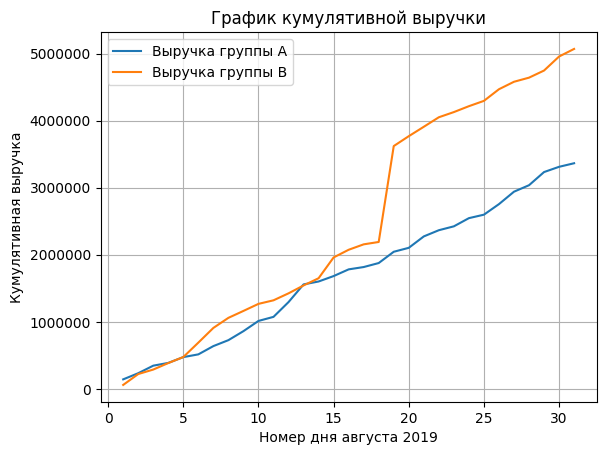

In [ ]:
plt.plot(ordersCummulative.index+1,ordersCummulative['revenue_a'],label='Выручка группы А')
plt.plot(ordersCummulative.index+1,ordersCummulative['revenue_b'], label='Выручка группы В')
plt.legend()
plt.ylabel('Кумулятивная выручка')
plt.xlabel('Номер дня августа 2019')
plt.ticklabel_format(style='plain')
plt.title('График кумулятивной выручки')
plt.grid()

Видно что группа В почти с начала немного вырывается вперед, но примерно с 18 числа темпа роста В по сравнения с А начинают разительно отличаться причем в сторону, тогда как у А на проятжении всего периода почти одинаковый темп роста. Это примерно на день-два - потом темпы роста В возвращаются на прежный уровень, а вот разрыву между средними кумулятивными выручками уже не вернутся на прежний уровень.

In [ ]:
ordersCummulative['revenue_b-a']=ordersCummulative['revenue_b']-ordersCummulative['revenue_a']
ordersCummulative['revenue_b/a-1']=ordersCummulative['revenue_b']/ordersCummulative['revenue_a']-1
ordersCummulative['orders_q_b-a']=ordersCummulative['transactionId_b']-ordersCummulative['transactionId_a']
ordersCummulative['orders_q_b/a-1']=ordersCummulative['transactionId_b']/ordersCummulative['transactionId_a']-1
ordersCummulative['buyers_q_b-a']=ordersCummulative['buyers_b']-ordersCummulative['buyers_a']
ordersCummulative['buyers_q_b/a-1']=ordersCummulative['buyers_b']/ordersCummulative['buyers_a']-1
ordersCummulative[['date','revenue_b-a','revenue_b/a-1','orders_q_b-a','orders_q_b/a-1','buyers_q_b-a','buyers_q_b/a-1']].tail(5)


,date,revenue_b-a,revenue_b/a-1,orders_q_b-a,orders_q_b/a-1,buyers_q_b-a,buyers_q_b/a-1
26,2019-08-27,1638841,0.557340,54,0.128878,60,0.146699
27,2019-08-28,1603577,0.528025,61,0.140553,67,0.158019
28,2019-08-29,1513377,0.468069,59,0.130820,65,0.147392
29,2019-08-30,1644420,0.496592,71,0.154348,78,0.173719
30,2019-08-31,1704316,0.506535,80,0.170940,87,0.190372


Накопленные или кумулятивные изменения к концу данного периода (месяц август 2019 года) на 31 день следующие:
1) абсолютная разница выручки - 1.704.316 у.е. в пользу показателя B, но эти цифры могут не говоряить не о чем хотя и не бесполезны

2) относительная разница выручки - 0.5 или 50% в пользу B - то есть гипотеза хотя бы по этому параметру может считаться успешной

3) абсолютная разница в количестве заказов - 80

4) относительная разница в количестве заказов 0.17 или около 17% тоже в сторону B что тоже может подтвердить гипотезу

5) абсолютная разница в количестве покупателй - 87

6) относительная разница в количестве покупателей 0.19 или около 19% тоже в сторону B что тоже может подтвердить гипотезу

In [ ]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [ ]:
ordersCummulative.head(3)

,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b,visitor_only_a,visitor_only_b,revenue_b-a,revenue_b/a-1,orders_q_b-a,orders_q_b/a-1,buyers_q_b-a,buyers_q_b/a-1
0,2019-08-01,142779,23,19,59758,17,17,719,713,-83021,-0.581465,-6,-0.260870,-2,-0.105263
1,2019-08-02,234381,42,37,221801,40,39,1338,1294,-12580,-0.053673,-2,-0.047619,2,0.054054
2,2019-08-03,346854,66,61,288850,54,53,1845,1803,-58004,-0.167229,-12,-0.181818,-8,-0.131148


In [ ]:
ordersCummulative['visitors_b-a']=ordersCummulative['visitor_only_b']-ordersCummulative['visitor_only_a']
ordersCummulative['visitors_b/a-1']=ordersCummulative['visitor_only_b']/ordersCummulative['visitor_only_a']-1
ordersCummulative.head(3)

,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b,visitor_only_a,visitor_only_b,revenue_b-a,revenue_b/a-1,orders_q_b-a,orders_q_b/a-1,buyers_q_b-a,buyers_q_b/a-1,visitors_b-a,visitors_b/a-1
0,2019-08-01,142779,23,19,59758,17,17,719,713,-83021,-0.581465,-6,-0.260870,-2,-0.105263,-6,-0.008345
1,2019-08-02,234381,42,37,221801,40,39,1338,1294,-12580,-0.053673,-2,-0.047619,2,0.054054,-44,-0.032885
2,2019-08-03,346854,66,61,288850,54,53,1845,1803,-58004,-0.167229,-12,-0.181818,-8,-0.131148,-42,-0.022764


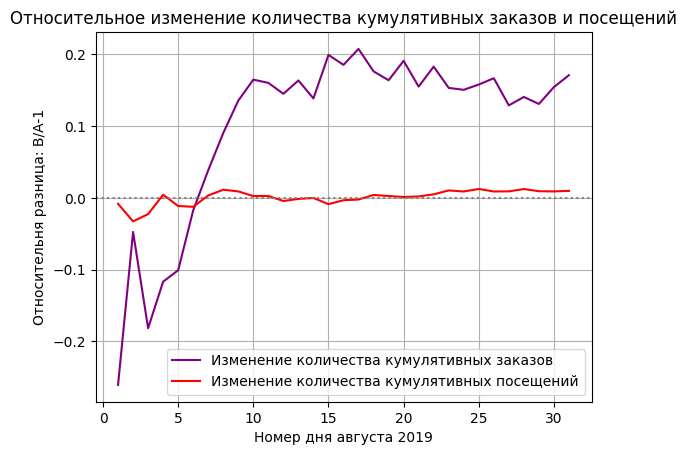

In [ ]:
plt.plot(ordersCummulative.index+1,ordersCummulative['orders_q_b/a-1'],label='Изменение количества кумулятивных заказов',color='purple')
plt.plot(ordersCummulative.index+1,ordersCummulative['visitors_b/a-1'], label='Изменение количества кумулятивных посещений',color='red')
plt.legend()
plt.ylabel('Относительня разница: B/A-1')
plt.xlabel('Номер дня августа 2019')
plt.title('Относительное изменение количества кумулятивных заказов и посещений')
plt.grid()
plt.axhline(y=0,linestyle=':', color='grey')

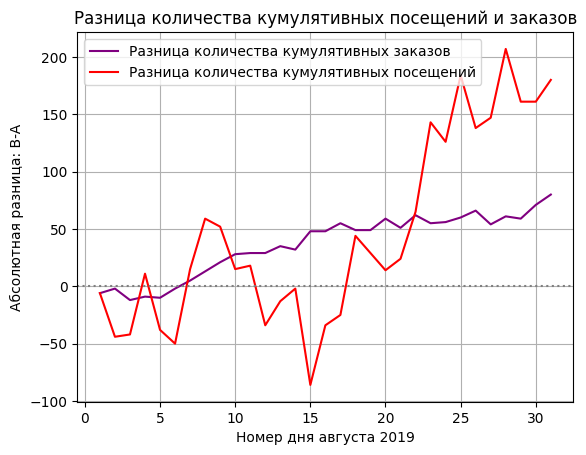

In [ ]:
plt.plot(ordersCummulative.index+1,ordersCummulative['orders_q_b-a'],label='Разница количества кумулятивных заказов',color='purple')
plt.plot(ordersCummulative.index+1,ordersCummulative['visitors_b-a'], label='Разница количества кумулятивных посещений',color='red')
plt.legend()
plt.ylabel('Абсолютная разница: B-A')
plt.xlabel('Номер дня августа 2019')
plt.grid()
plt.title('Разница количества кумулятивных посещений и заказов')
plt.axhline(y=0,linestyle=':', color='grey')

In [ ]:
cum = defaultdict(list)

for date in set(orders['date']):
    for gr in set(orders['group']):
        cum['date'] += [date]
        cum['group'] += [gr]
        cum['buyers'] += [orders.loc[(orders['group'] == gr) & (orders['date'] <= date), "visitorId"].nunique()]
        cum['orders'] += [orders.loc[(orders['group'] == gr) & (orders['date'] <= date), :].shape[0]]
        cum['visitors'] += [visitors.loc[(visitors['group'] == gr) & (visitors['date'] <= date), "visitors"].sum()]

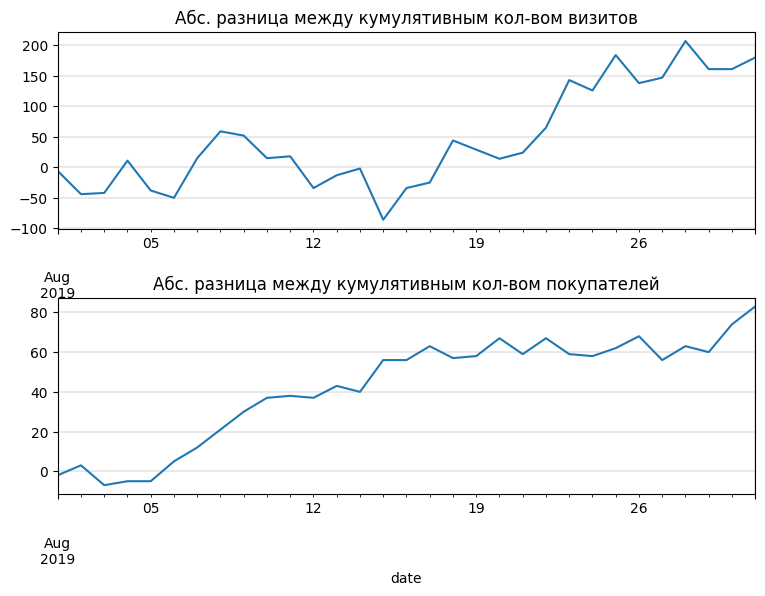

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(9, 6))
plt.subplots_adjust(hspace=0.35)
axes = axes.flatten()
ax = axes[0]
pd.DataFrame(cum).pivot_table(index='date', columns='group', values='visitors').diff(axis=1).iloc[:, -1].plot(ax=ax)
ax.set_title("Абс. разница между кумулятивным кол-вом визитов")
ax.grid(color='grey', lw=0.25)

ax = axes[1]
pd.DataFrame(cum).pivot_table(index='date', columns='group', values='buyers').diff(axis=1).iloc[:, -1].plot(ax=ax)
ax.set_title("Абс. разница между кумулятивным кол-вом покупателей")
ax.grid(color='grey', lw=0.25)

У графиков разные формы и абсолютные значения.

<hr style="border: 2px solid red;" />

### Отобразим график кумулятивного среднего чека по группам.

In [ ]:
ordersCummulative.head()

,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b,visitor_only_a,visitor_only_b,revenue_b-a,revenue_b/a-1,orders_q_b-a,orders_q_b/a-1,buyers_q_b-a,buyers_q_b/a-1,visitors_b-a,visitors_b/a-1
0,2019-08-01,142779,23,19,59758,17,17,719,713,-83021,-0.581465,-6,-0.260870,-2,-0.105263,-6,-0.008345
1,2019-08-02,234381,42,37,221801,40,39,1338,1294,-12580,-0.053673,-2,-0.047619,2,0.054054,-44,-0.032885
2,2019-08-03,346854,66,61,288850,54,53,1845,1803,-58004,-0.167229,-12,-0.181818,-8,-0.131148,-42,-0.022764
3,2019-08-04,388030,77,72,385740,68,66,2562,2573,-2290,-0.005902,-9,-0.116883,-6,-0.083333,11,0.004294
4,2019-08-05,474413,99,94,475648,89,87,3318,3280,1235,0.002603,-10,-0.101010,-7,-0.074468,-38,-0.011453


In [ ]:
ordersCummulative_avg_bill=ordersCummulative.loc[:,'date':'buyers_b']
ordersCummulative_avg_bill.head()

,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b
0,2019-08-01,142779,23,19,59758,17,17
1,2019-08-02,234381,42,37,221801,40,39
2,2019-08-03,346854,66,61,288850,54,53
3,2019-08-04,388030,77,72,385740,68,66
4,2019-08-05,474413,99,94,475648,89,87


In [ ]:
ordersCummulative_avg_bill['avg_bill_a']=ordersCummulative_avg_bill['revenue_a']/ordersCummulative_avg_bill['transactionId_a']
ordersCummulative_avg_bill['avg_bill_b']=ordersCummulative_avg_bill['revenue_b']/ordersCummulative_avg_bill['transactionId_b']
ordersCummulative_avg_bill['cum_arppu_a']=ordersCummulative_avg_bill['revenue_a']/ordersCummulative_avg_bill['buyers_a']
ordersCummulative_avg_bill['cum_arppu_b']=ordersCummulative_avg_bill['revenue_b']/ordersCummulative_avg_bill['buyers_b']
ordersCummulative_avg_bill['purchases_buyers_a']=ordersCummulative_avg_bill['transactionId_a']/ordersCummulative_avg_bill['buyers_a']
ordersCummulative_avg_bill['purchases_buyers_b']=ordersCummulative_avg_bill['transactionId_b']/ordersCummulative_avg_bill['buyers_b']
display(ordersCummulative_avg_bill.head())
ordersCummulative_avg_bill.tail()

,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b,avg_bill_a,avg_bill_b,cum_arppu_a,cum_arppu_b,purchases_buyers_a,purchases_buyers_b
0,2019-08-01,142779,23,19,59758,17,17,6207.782609,3515.176471,7514.684211,3515.176471,1.210526,1.000000
1,2019-08-02,234381,42,37,221801,40,39,5580.500000,5545.025000,6334.621622,5687.205128,1.135135,1.025641
2,2019-08-03,346854,66,61,288850,54,53,5255.363636,5349.074074,5686.131148,5450.000000,1.081967,1.018868
3,2019-08-04,388030,77,72,385740,68,66,5039.350649,5672.647059,5389.305556,5844.545455,1.069444,1.030303
4,2019-08-05,474413,99,94,475648,89,87,4792.050505,5344.359551,5046.946809,5467.218391,1.053191,1.022989


,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b,avg_bill_a,avg_bill_b,cum_arppu_a,cum_arppu_b,purchases_buyers_a,purchases_buyers_b
26,2019-08-27,2940471,419,409,4579312,473,469,7017.830549,9681.420719,7189.415648,9763.991471,1.024450,1.008529
27,2019-08-28,3036933,434,424,4640510,495,491,6997.541475,9374.767677,7162.577830,9451.140530,1.023585,1.008147
28,2019-08-29,3233233,451,441,4746610,510,506,7169.031042,9307.078431,7331.594104,9380.652174,1.022676,1.007905
29,2019-08-30,3311413,460,449,4955833,531,527,7198.723913,9333.018832,7375.084633,9403.857685,1.024499,1.007590
30,2019-08-31,3364656,468,457,5068972,548,544,7189.435897,9249.948905,7362.485777,9317.963235,1.024070,1.007353


Для начала можно отметить что на одного пользователя приходится примерно 1 покупка в обоих группах - в А стабильно немного выше - на 0.015

In [ ]:
ordersCummulative_avg_bill['bil_b/a-1']=ordersCummulative_avg_bill['avg_bill_b']/ordersCummulative_avg_bill['avg_bill_a']-1
print('Самое больше отличие в средних кумулятивных чеках:',round(ordersCummulative_avg_bill['bil_b/a-1'].max()*100,2),'процентов')
print('Самое больше отличие в средних кумулятивных чеках произошло в августе:',ordersCummulative_avg_bill[ordersCummulative_avg_bill['bil_b/a-1']==ordersCummulative_avg_bill['bil_b/a-1'].max()].index.values+1,'числа')
display(ordersCummulative_avg_bill[['date','bil_b/a-1']].head())
display(ordersCummulative_avg_bill[['date','bil_b/a-1']].tail(13))


Самое больше отличие в средних кумулятивных чеках: 52.13 процентов
Самое больше отличие в средних кумулятивных чеках произошло в августе: [19] числа


,date,bil_b/a-1
0,2019-08-01,-0.433747
1,2019-08-02,-0.006357
2,2019-08-03,0.017831
3,2019-08-04,0.125670
4,2019-08-05,0.115255


,date,bil_b/a-1
18,2019-08-19,0.521302
19,2019-08-20,0.504051
20,2019-08-21,0.488206
21,2019-08-22,0.447048
22,2019-08-23,0.476511
23,2019-08-24,0.439004
24,2019-08-25,0.427653
25,2019-08-26,0.390024
26,2019-08-27,0.379546
27,2019-08-28,0.339723


После 19 числа среднего кумультивного чек В убывает

В резултате 31 числа разница между группами составляет около 29% в пользу В

Построим график кумулятивных средних чеков по группам

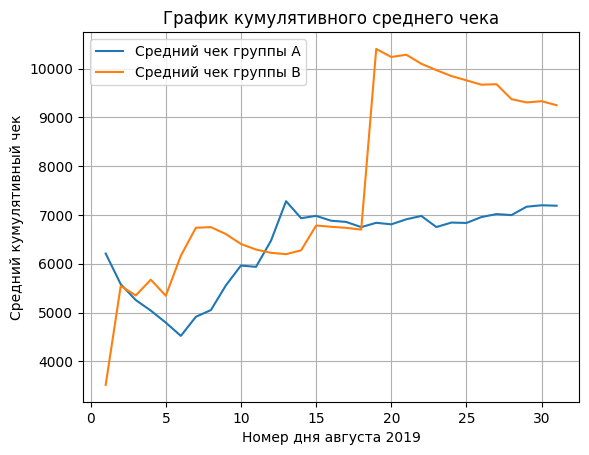

In [ ]:
plt.plot(ordersCummulative_avg_bill.index+1,ordersCummulative_avg_bill['avg_bill_a'],label='Средний чек группы А')
plt.plot(ordersCummulative_avg_bill.index+1,ordersCummulative_avg_bill['avg_bill_b'], label='Средний чек группы В')
plt.legend()
plt.ylabel('Средний кумулятивный чек')
plt.xlabel('Номер дня августа 2019')
plt.title('График кумулятивного среднего чека')
plt.grid()

График похож на график из 1 задания А/В теста но как-будто более вздутый - тут так же отчетливее виден период днем пересечений графиков - то есть когда средний чек группы В был ниже группы А - хотя в остальное время В выше А. Также тут отчетливее виден рост где-то 18 числа - что значительно увеличивает средний чек - тут может идти речь об аномальных значениях - кто-то совершил очень большую покупку - при этом только в одной группе. На лицо всплеск. Можно отчетливее это подтвердить на графике обычных - не кумулятивных значений

In [ ]:
display(orders_date.head(3))
display(orders_date.tail(3))

,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b,visitor_only_a,visitor_only_b
0,2019-08-01,142779,23,19,59758,17,17,719,713
1,2019-08-02,91602,19,18,162043,23,22,619,581
2,2019-08-03,112473,24,24,67049,14,14,507,509


,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b,visitor_only_a,visitor_only_b
28,2019-08-29,196300,17,17,106100,15,15,577,531
29,2019-08-30,78180,9,8,209223,21,21,490,490
30,2019-08-31,53243,8,8,113139,17,17,699,718


Построим график выручки по дням:

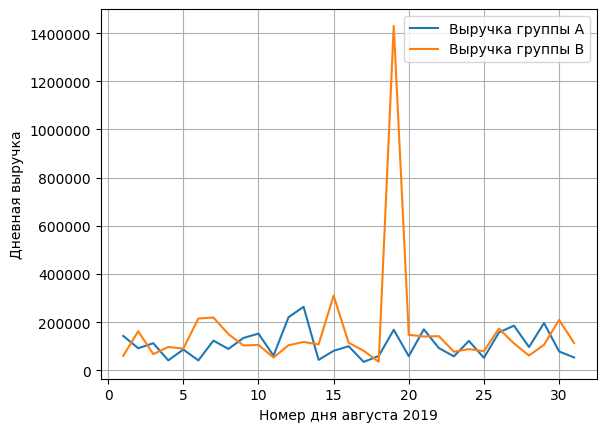

In [ ]:
plt.plot(orders_date.index+1,orders_date['revenue_a'],label='Выручка группы А')
plt.plot(orders_date.index+1,orders_date['revenue_b'], label='Выручка группы В')
plt.legend()
plt.ylabel('Дневная выручка')
plt.xlabel('Номер дня августа 2019')
plt.ticklabel_format(style='plain')
plt.grid()

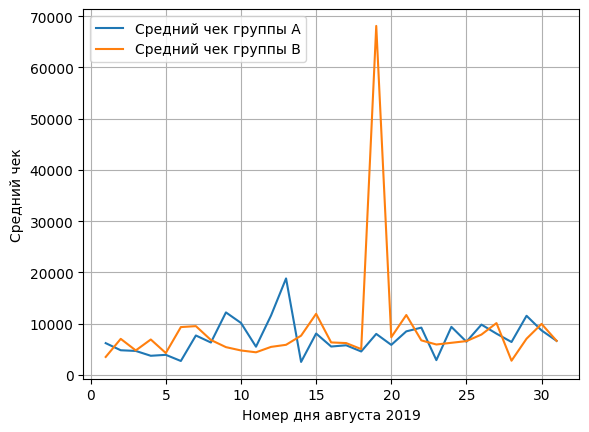

In [ ]:
plt.plot(orders_date.index+1,orders_date['revenue_a']/orders_date['transactionId_a'],label='Средний чек группы А')
plt.plot(orders_date.index+1,orders_date['revenue_b']/orders_date['transactionId_b'], label='Средний чек группы B')
plt.legend()
plt.ylabel('Средний чек')
plt.xlabel('Номер дня августа 2019')
plt.grid()

На лицо всплеск. Очевидно 18 числа кто-то редкий и богатый купил много. Либо есть место искажением при записи данных. Данные всплески могут исказить выводы о различии или схожести групп.

На графике среднего чека отчетливее виден рост где-то 18 числа - что значительно увеличивает средний чек у группы В - тут может идти речь об аномальных значениях - кто-то совершил очень большую покупку - при этом только в одной группе. На лицо всплеск. Такие всплески могут исказить выводы о различии или схожести групп.

После 19 числа среднего кумультивного чек В убывает

В результате 31 числа разница между группами составляет около 29% в пользу В

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

In [ ]:
ordersCummulative_avg_bill['avg_b/a-1']=ordersCummulative_avg_bill['avg_bill_b']/ordersCummulative_avg_bill['avg_bill_a']-1
display(ordersCummulative_avg_bill[['date','avg_bill_a','avg_bill_b','avg_b/a-1']].head())
display(ordersCummulative_avg_bill[['date','avg_bill_a','avg_bill_b','avg_b/a-1']].tail())

,date,avg_bill_a,avg_bill_b,avg_b/a-1
0,2019-08-01,6207.782609,3515.176471,-0.433747
1,2019-08-02,5580.500000,5545.025000,-0.006357
2,2019-08-03,5255.363636,5349.074074,0.017831
3,2019-08-04,5039.350649,5672.647059,0.125670
4,2019-08-05,4792.050505,5344.359551,0.115255


,date,avg_bill_a,avg_bill_b,avg_b/a-1
26,2019-08-27,7017.830549,9681.420719,0.379546
27,2019-08-28,6997.541475,9374.767677,0.339723
28,2019-08-29,7169.031042,9307.078431,0.298234
29,2019-08-30,7198.723913,9333.018832,0.296482
30,2019-08-31,7189.435897,9249.948905,0.286603


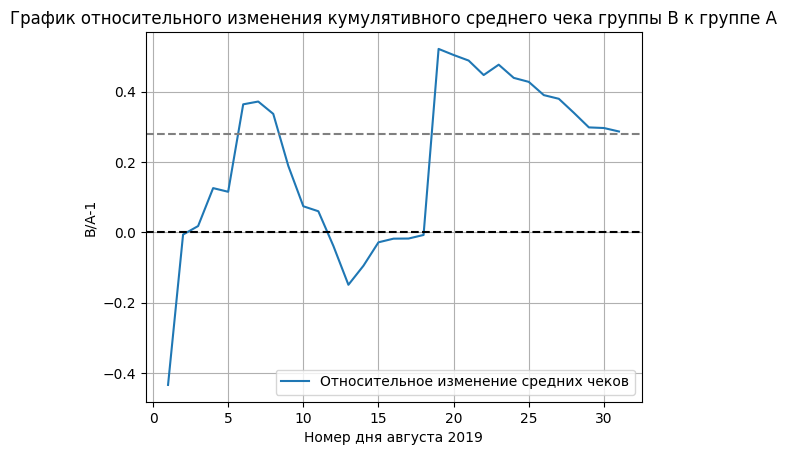

In [ ]:
plt.plot(ordersCummulative_avg_bill.index+1,ordersCummulative_avg_bill['avg_b/a-1'],label='Относительное изменение средних чеков')
plt.axhline(y=0,linestyle='--', color='black')
plt.axhline(y=0.28,linestyle='--', color='grey')
plt.legend()
plt.ylabel('B/A-1')
plt.xlabel('Номер дня августа 2019')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid();

Как видно сначал средний чек группы А больше среднего чека группы В, однако уже ко 2-3 дню резуьтат координально меняется и почти постоянно (кроме отрезка времени примерно с 11 по 15 августа) средний кумулятивный чек группы B больше чем у группы А. Заканчиваются измерения среднего относительного кумулятвног чека на значении 0.28 в сторону В.
Вышесказанное добовляет аргумент в пользу работоспособности гипотезы.

### Построим график кумулятивного среднего количества заказов на посетителя по группам.

In [ ]:
display(ordersCummulative[['date','transactionId_a','visitor_only_a','transactionId_b','visitor_only_b',]].head())
display(ordersCummulative[['date','transactionId_a','visitor_only_a','transactionId_b','visitor_only_b',]].tail())

,date,transactionId_a,visitor_only_a,transactionId_b,visitor_only_b
0,2019-08-01,23,719,17,713
1,2019-08-02,42,1338,40,1294
2,2019-08-03,66,1845,54,1803
3,2019-08-04,77,2562,68,2573
4,2019-08-05,99,3318,89,3280


,date,transactionId_a,visitor_only_a,transactionId_b,visitor_only_b
26,2019-08-27,419,16376,473,16523
27,2019-08-28,434,16970,495,17177
28,2019-08-29,451,17547,510,17708
29,2019-08-30,460,18037,531,18198
30,2019-08-31,468,18736,548,18916


In [ ]:
ordersCummulative['orders_by_visitor_a']=ordersCummulative['transactionId_a']/ordersCummulative['visitor_only_a']
ordersCummulative['orders_by_visitor_b']=ordersCummulative['transactionId_b']/ordersCummulative['visitor_only_b']
display(ordersCummulative[['date','transactionId_a','visitor_only_a','transactionId_b','visitor_only_b','orders_by_visitor_a','orders_by_visitor_b']].head(3))
display(ordersCummulative[['date','transactionId_a','visitor_only_a','transactionId_b','visitor_only_b','orders_by_visitor_a','orders_by_visitor_b']].tail(3))


,date,transactionId_a,visitor_only_a,transactionId_b,visitor_only_b,orders_by_visitor_a,orders_by_visitor_b
0,2019-08-01,23,719,17,713,0.031989,0.023843
1,2019-08-02,42,1338,40,1294,0.031390,0.030912
2,2019-08-03,66,1845,54,1803,0.035772,0.029950


,date,transactionId_a,visitor_only_a,transactionId_b,visitor_only_b,orders_by_visitor_a,orders_by_visitor_b
28,2019-08-29,451,17547,510,17708,0.025702,0.028801
29,2019-08-30,460,18037,531,18198,0.025503,0.029179
30,2019-08-31,468,18736,548,18916,0.024979,0.028970


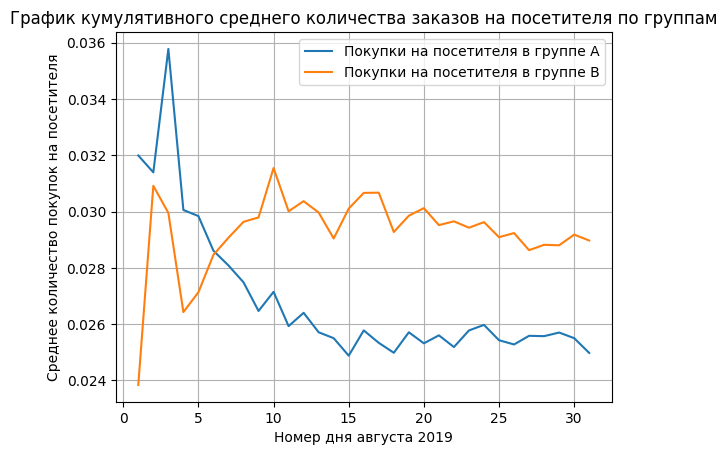

In [ ]:
plt.plot(ordersCummulative.index+1,ordersCummulative['orders_by_visitor_a'],label='Покупки на посетителя в группе А')
plt.plot(ordersCummulative.index+1,ordersCummulative['orders_by_visitor_b'], label='Покупки на посетителя в группе В')
plt.legend()
plt.ylabel('Среднее количество покупок на посетителя')
plt.xlabel('Номер дня августа 2019')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.grid()

До 6 числа среднее количество кумулятивных покупок на посетителя в группе А больше чем в группе В, но после 6 числа наоборот в группе В среднее количество кумулятивных покупок на посетителя в группе В становится больше чем в группе А.
На 1 посетителя приходтся около 0.03 или 3/100 (три сотые) покупки. То есть в среднем на 33 посетителей приходится около 1 покупки.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

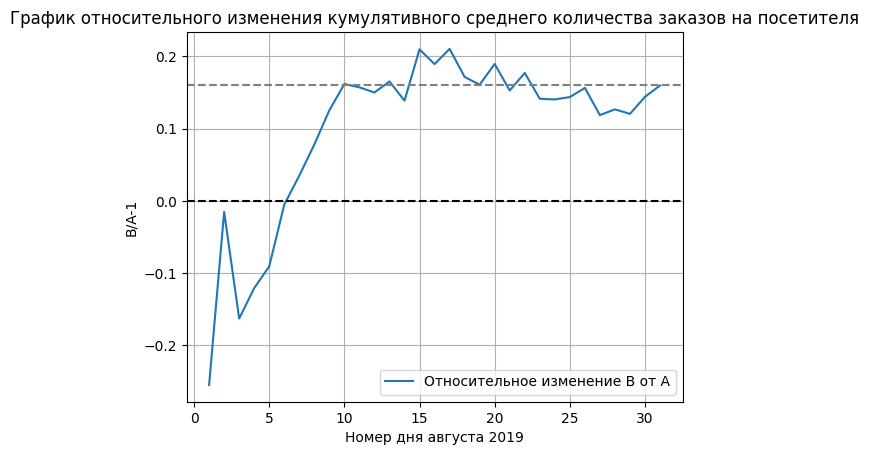

In [ ]:
plt.plot(ordersCummulative.index+1,ordersCummulative['orders_by_visitor_b']/ordersCummulative['orders_by_visitor_a']-1,label='Относительное изменение B от А')
plt.axhline(y=0,linestyle='--', color='black')
plt.axhline(y=0.16,linestyle='--', color='grey')
plt.legend()
plt.ylabel('B/A-1')
plt.xlabel('Номер дня августа 2019')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.grid();

По этому графику можно сделать такой же вывод как и по предыдщему графику смена позиций происходит 6 числа. Данный показатель менбше 0 до 6 числа и больше нуля после 6 числа. На 31 день график вырванивается около значения 0.16 - 16%. Что подтверждает нашу гипотезу. Очевидно что такие графики показывают стабилизацию значений по прошествию времени, иначе говоря у графика в начале такое значение из-за того что показатель еще не успел устоятся, но люди в начале успели заказать больше чем в среднем должны были.

### Построим точечный график количества заказов по пользователям

In [ ]:

orders_users=orders.pivot_table(index=['group','visitorId'],values='transactionId',aggfunc='nunique').reset_index()
orders_users.columns=['group','visitorId','orders']
orders_users


,group,visitorId,orders
0,A,11685486,1
1,A,54447517,1
2,A,66685450,1
3,A,78758296,1
4,A,85103373,1
...,...,...,...
968,B,4251115836,1
969,B,4258103007,1
970,B,4279090005,1
971,B,4281247801,1


In [ ]:
orders['visitorId'].nunique()

973

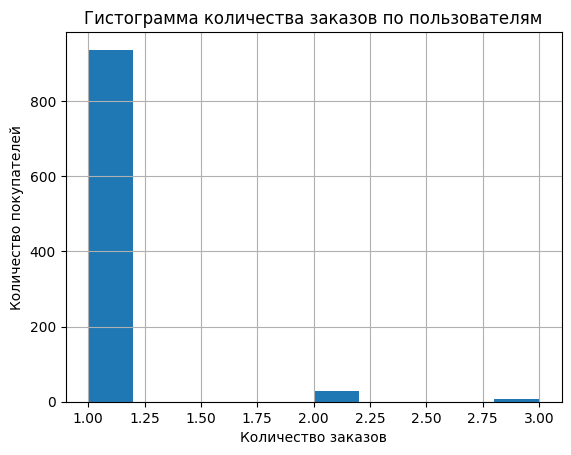

In [ ]:
plt.hist(orders_users['orders'])
plt.xlabel('Количество заказов')
plt.ylabel('Количество покупателей')
plt.title('Гистограмма количества заказов по пользователям')
plt.grid();

Text(0.5, 1.0, 'Точечный график количества заказов по пользователям')

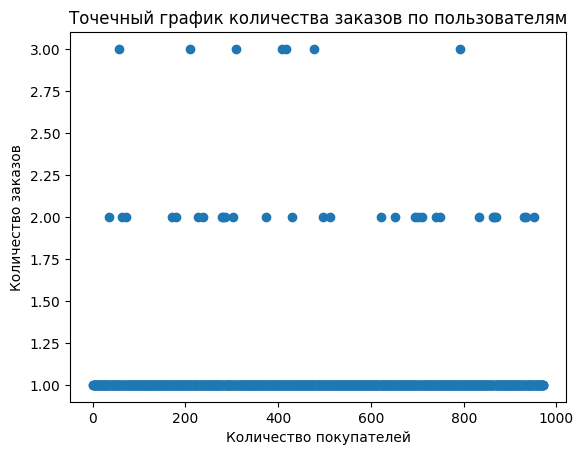

In [ ]:
plt.scatter(orders_users.index,orders_users['orders'])
plt.ylabel('Количество заказов')
plt.xlabel('Количество покупателей')
plt.title('Точечный график количества заказов по пользователям')
plt.grid();

До 3 заказов редко доходит у пользователей. Можно сказать что распределение покупаетелей похоже на биноминальное - чем больше покупок тем меньше количество таких покупателей (ситуаций).

### Рассчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [ ]:
orders_users

,group,visitorId,orders
0,A,11685486,1
1,A,54447517,1
2,A,66685450,1
3,A,78758296,1
4,A,85103373,1
...,...,...,...
968,B,4251115836,1
969,B,4258103007,1
970,B,4279090005,1
971,B,4281247801,1


In [ ]:
print('Перцентили количества заказов на пользователя 95 и 99 соответственно:',np.percentile(orders_users['orders'],[95,99]).astype('int'))

Перцентили количества заказов на пользователя 95 и 99 соответственно: [1 2]


Не более 5% пользователей оформляли больше чем 1  заказов. И 1% пользователей заказывали более 2 раз.
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Построим точечный график стоимостей заказов

In [ ]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


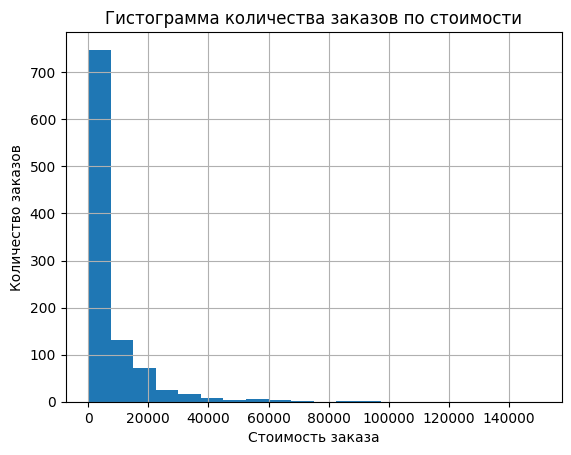

In [ ]:
orders['revenue'].hist(range=(0,150000),bins=20)
plt.xlabel('Стоимость заказа')
plt.ylabel('Количество заказов')
plt.title('Гистограмма количества заказов по стоимости');

In [ ]:
orders=orders.sort_index()
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


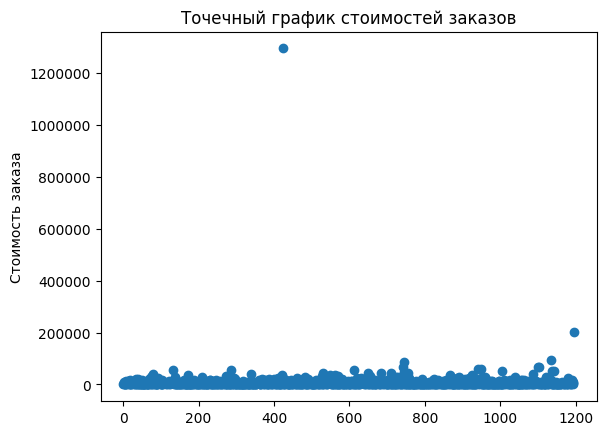

In [ ]:
plt.scatter(orders.index,orders['revenue'])
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимостей заказов')
plt.ticklabel_format(style='plain')
plt.grid()

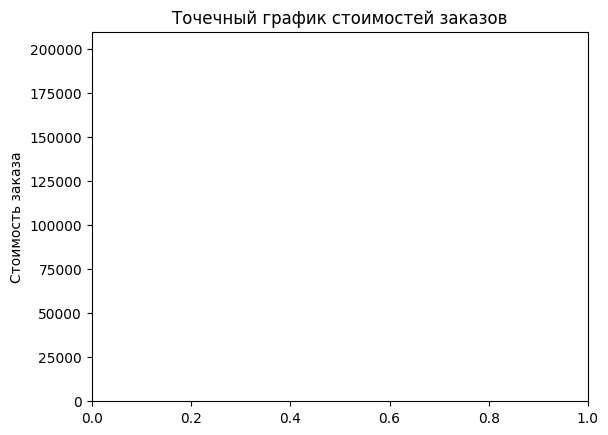

In [ ]:
#Руководство
plt.ylim(0,210000)
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимостей заказов')
plt.ticklabel_format(style='plain')
plt.grid()

Как видно в основном заказы распологаются до 100.000 у.е. И есть всего 2 заказа которые особо выделяются - это заказ на 1.300.000 у.е. и заказ на 210.000 у.е.

### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [ ]:
print('95 и 99 перцентили стоимости заказа соответственно равны:',np.percentile(orders['revenue'],[95,99]))

95 и 99 перцентили стоимости заказа соответственно равны: [26785. 53904.]


Думаю тут целесообразнее выбрать верхнюю границу ближе к 99 перцентилю так как при взгляде на график довольно много заказов после 26 тысяч у.е. и до 100 тысяч у.е. Целесообразнее выбрать значение в 40.000 у.е. как верхнюю границу.

<br>
    <img width="320" src=https://storage.yandexcloud.net/public-bucket-6/outliers_1.png><br>

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [ ]:
orders_users_group=orders.pivot_table(index=['group','visitorId'],values='transactionId',aggfunc='nunique')

orders_users_group

transactionId
group visitorId                
A     11685486                1
      54447517                1
      66685450                1
      78758296                1
      85103373                1
...                         ...
B     4251115836              1
      4258103007              1
      4279090005              1
      4281247801              1
      4283872382              1

[973 rows x 1 columns]

In [ ]:
sampleA=pd.concat(
[orders_users.query('group=="A"')['orders'].reset_index(drop=True),
     pd.Series(0,index=np.arange(orders_date['visitor_only_a'].sum()-orders.query('group=="A"')['visitorId'].nunique()),name='orders')],
    axis=0
    )
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

In [ ]:
sampleB=pd.concat(
[orders_users.query('group=="B"')['orders'].reset_index(drop=True),
     pd.Series(0,index=np.arange(orders_date['visitor_only_b'].sum()-orders.query('group=="B"')['visitorId'].nunique()),name='orders')],
    axis=0
    )
sampleB

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Name: orders, Length: 18916, dtype: int64

In [ ]:
print('Cтатистическая значимость различий в среднем количестве заказов:',round(stats.mannwhitneyu(sampleA,sampleB)[1],4))
print('Относительное различие в среднем количестве заказов между группами:',round(sampleB.mean()/sampleA.mean()-1,3))

Cтатистическая значимость различий в среднем количестве заказов: 0.011
Относительное различие в среднем количестве заказов между группами: 0.16


P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего количества заказов группы B к  группе A равен 16%.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

In [ ]:
print('Cтатистическая значимость различий в среднем чеке:',round(stats.mannwhitneyu(orders.query('group=="A"')['revenue'],orders.query('group=="B"')['revenue'])[1],2))
print('Относительное различие в среднем чеке между группами:',round(orders.query('group=="A"')['revenue'].mean()/orders.query('group=="B"')['revenue'].mean()-1,2))

Cтатистическая значимость различий в среднем чеке: 0.83
Относительное различие в среднем чеке между группами: -0.22


P-value равно 0.83, что значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно ниже среднего чека группы A (на 22%).

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Из пункта 2.7 возьмем данные по верхней границе количества заказов - это 2 заказа - заказы начиная с 3 будем считать аномальными и значит уберем их или отчистим. Из пункта 2.9 возьмем данные по верхней границе стоимости заказов - это 40.000 у.е. - заказы начиная с этого значения будем считать аномальными и значит уберем их или отчистим.

In [ ]:
display(only_visitors_date.head(3))
display(only_visitors_date.tail(3))

,date,visitor_only_a,visitor_only_b
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509


,date,visitor_only_a,visitor_only_b
28,2019-08-29,577,531
29,2019-08-30,490,490
30,2019-08-31,699,718


In [ ]:
display(orders_date.head(3))
display(orders_date.tail(3))

,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b,visitor_only_a,visitor_only_b
0,2019-08-01,142779,23,19,59758,17,17,719,713
1,2019-08-02,91602,19,18,162043,23,22,619,581
2,2019-08-03,112473,24,24,67049,14,14,507,509


,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b,visitor_only_a,visitor_only_b
28,2019-08-29,196300,17,17,106100,15,15,577,531
29,2019-08-30,78180,9,8,209223,21,21,490,490
30,2019-08-31,53243,8,8,113139,17,17,699,718


In [ ]:
display(only_visitors_date_cum.head(3))
display(only_visitors_date_cum.tail(3))

,date,visitor_only_a,visitor_only_b
0,2019-08-01,719,713
1,2019-08-02,1338,1294
2,2019-08-03,1845,1803


,date,visitor_only_a,visitor_only_b
28,2019-08-29,17547,17708
29,2019-08-30,18037,18198
30,2019-08-31,18736,18916


In [ ]:
display(ordersCummulative.head(3))
display(ordersCummulative.tail(3))

,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b,visitor_only_a,visitor_only_b,revenue_b-a,revenue_b/a-1,orders_q_b-a,orders_q_b/a-1,buyers_q_b-a,buyers_q_b/a-1,visitors_b-a,visitors_b/a-1,orders_by_visitor_a,orders_by_visitor_b
0,2019-08-01,142779,23,19,59758,17,17,719,713,-83021,-0.581465,-6,-0.260870,-2,-0.105263,-6,-0.008345,0.031989,0.023843
1,2019-08-02,234381,42,37,221801,40,39,1338,1294,-12580,-0.053673,-2,-0.047619,2,0.054054,-44,-0.032885,0.031390,0.030912
2,2019-08-03,346854,66,61,288850,54,53,1845,1803,-58004,-0.167229,-12,-0.181818,-8,-0.131148,-42,-0.022764,0.035772,0.029950


,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b,visitor_only_a,visitor_only_b,revenue_b-a,revenue_b/a-1,orders_q_b-a,orders_q_b/a-1,buyers_q_b-a,buyers_q_b/a-1,visitors_b-a,visitors_b/a-1,orders_by_visitor_a,orders_by_visitor_b
28,2019-08-29,3233233,451,441,4746610,510,506,17547,17708,1513377,0.468069,59,0.130820,65,0.147392,161,0.009175,0.025702,0.028801
29,2019-08-30,3311413,460,449,4955833,531,527,18037,18198,1644420,0.496592,71,0.154348,78,0.173719,161,0.008926,0.025503,0.029179
30,2019-08-31,3364656,468,457,5068972,548,544,18736,18916,1704316,0.506535,80,0.170940,87,0.190372,180,0.009607,0.024979,0.028970


**Сделаем срез пользователей с числом заказов больше или равно 3 (many_orders_users_group)**

In [ ]:
many_orders_users=orders_users.query('orders>=3')
many_orders_users.sort_values(by='visitorId')

,group,visitorId,orders
478,B,249864742,3
58,A,611059232,3
211,A,2108163459,3
792,B,2742574263,3
310,A,2988190573,3
409,A,3908431265,3
416,A,3967698036,3


**Сделаем срез пользователей с суммой 1 заказа больше 40.000 у.е. (many_orders_users_group)**

In [ ]:

expensive_orders_users=orders.query('revenue>40000').pivot_table(index=['group','visitorId'],values='revenue',aggfunc='max').reset_index()
expensive_orders_users.columns=['group','visitorId','orders']
expensive_orders_users.sort_values(by='visitorId')

,group,visitorId,orders
0,A,148427295,65710
1,A,358944393,42740
2,A,382846391,43690
3,A,759473111,52480
14,B,834731816,41450
4,A,887908475,60450
15,B,888512513,86620
5,A,950626008,45880
6,A,1164614297,66350
7,A,1307669133,92550


In [ ]:
abnormal_users=pd.concat([many_orders_users,expensive_orders_users],axis=0).sort_values(by='visitorId')
abnormal_users

,group,visitorId,orders
0,A,148427295,65710
478,B,249864742,3
1,A,358944393,42740
2,A,382846391,43690
58,A,611059232,3
3,A,759473111,52480
14,B,834731816,41450
4,A,887908475,60450
15,B,888512513,86620
5,A,950626008,45880


In [ ]:
abnormal_users_cleaned=abnormal_users.drop_duplicates(subset='visitorId')
print('Количество строк с id аномальных пользователей:',abnormal_users['visitorId'].count())
abnormal_users_cleaned

Количество строк с id аномальных пользователей: 30


,group,visitorId,orders
0,A,148427295,65710
478,B,249864742,3
1,A,358944393,42740
2,A,382846391,43690
58,A,611059232,3
3,A,759473111,52480
14,B,834731816,41450
4,A,887908475,60450
15,B,888512513,86620
5,A,950626008,45880


In [ ]:
sampleAFiltered=pd.concat(
[orders_users.query('group=="A"')[np.logical_not(orders_users.query('group=="A"')['visitorId'].isin(abnormal_users_cleaned['visitorId']))]['orders'].reset_index(drop=True),
     pd.Series(0,index=np.arange(orders_date['visitor_only_a'].sum()-orders.query('group=="A"')['visitorId'].nunique()),name='orders')],
    axis=0
    )
sampleAFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18717, dtype: int64

In [ ]:
sampleBFiltered=pd.concat(
[orders_users.query('group=="B"')[np.logical_not(orders_users.query('group=="B"')['visitorId'].isin(abnormal_users_cleaned['visitorId']))]['orders'].reset_index(drop=True),
     pd.Series(0,index=np.arange(orders_date['visitor_only_b'].sum()-orders.query('group=="B"')['visitorId'].nunique()),name='orders')],
    axis=0
    )
sampleBFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Name: orders, Length: 18905, dtype: int64

In [ ]:
print('Cтатистическая значимость различий в среднем количестве заказов:',round(stats.mannwhitneyu(sampleAFiltered,sampleBFiltered)[1],4))
print('Относительное различие в среднем количестве заказов между группами:',round(sampleBFiltered.mean()/sampleAFiltered.mean()-1,3))

Cтатистическая значимость различий в среднем количестве заказов: 0.0044
Относительное различие в среднем количестве заказов между группами: 0.205


Количество строк с id аномальных пользователей равно 30 - "отчистили" данные от этих "аномальных" пользователей.
P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «очищенных данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 20.5%, что является значительным и подтверждает, что Наша гипотеза работает.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [ ]:
print('Cтатистическая значимость различий в среднем чеке:',round(stats.mannwhitneyu(orders.query('group=="A"')[np.logical_not(orders.query('group=="A"')['visitorId'].isin(abnormal_users_cleaned['visitorId']))]['revenue'],
                                                                                                  orders.query('group=="B"')[np.logical_not(orders.query('group=="B"')['visitorId'].isin(abnormal_users_cleaned['visitorId']))]['revenue'])[1],2))
print('Относительное различие в среднем чеке между группами:',round(orders.query('group=="B"')[np.logical_not(orders.query('group=="B"')['visitorId'].isin(abnormal_users_cleaned['visitorId']))]['revenue'].mean()
                                                                                                  /orders.query('group=="A"')[np.logical_not(orders.query('group=="A"')['visitorId'].isin(abnormal_users_cleaned['visitorId']))]['revenue'].mean()-1,2))

Cтатистическая значимость различий в среднем чеке: 0.94
Относительное различие в среднем чеке между группами: 0.05


P-value равно 0.94, что значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Cредний чек группы B почти не отличается от среднего чека группы А (отличия около 5 процентов в пользу В).

### Заключение о тесте

Cтатистическая значимость различий в среднем количестве заказов по сырым данным равна 0.011, а по очищенным данным равна 0.0044. Значит, между группами как были так и остались значимые различия.

Относительный прирост среднего количества заказов B к группе A до отчистки был равен 16%, а стал 20.5%, что является значительным и подтверждает, что Наша гипотеза работает.


Cтатистическая значимость различий в среднем чеке по сырым данным равно 0.83., а по очищенным данным равна 0.94. Значит, между группами как НЕ было статзначимых различий так и не появилось этих различий после отчистки.

Относительный прирост среднего количества заказов B к группе A до отчистки был равен -22%, а стал 5%, что является положительным трендом.

Показатель относительного различия среднего количества заказов однозначно подтверждает гипотезу, однако показатель различия  среднего чека уже не так однозначен. Да, после удаления аномалий он стал больше 0, то есть В стало больше А по данному показателю, НО выборки нельзя признать различными.

In [ ]:
orders_cleaned=orders[np.logical_not(orders['visitorId'].isin(abnormal_users_cleaned['visitorId']))]
orders_cleaned.head(3)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B


In [ ]:
orders_cleaned_date_a=orders_cleaned.query('group=="A"').groupby('date',as_index=False).agg({'revenue':'sum','transactionId':'nunique','visitorId':'nunique'})
orders_cleaned_date_b=orders_cleaned.query('group=="B"').groupby('date',as_index=False).agg({'revenue':'sum','transactionId':'nunique','visitorId':'nunique'})
orders_cleaned_date=orders_cleaned_date_a.merge(orders_cleaned_date_b, on='date')
orders_cleaned_date.columns=['date' ,'revenue_a' ,'transactionId_a' ,'buyers_a' ,'revenue_b' ,'transactionId_b' ,'buyers_b']
display(orders_cleaned_date.head(3))
display(orders_cleaned_date.tail(3))

,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b
0,2019-08-01,112340,18,17,59758,17,17
1,2019-08-02,89912,18,17,162043,23,22
2,2019-08-03,112473,24,24,67049,14,14


,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b
28,2019-08-29,153560,16,16,106100,15,15
29,2019-08-30,33030,7,7,163443,20,20
30,2019-08-31,53243,8,8,113139,17,17


In [ ]:
ordersCummulative_cleaned=orders_cleaned_date.set_index('date').cumsum(axis=0).reset_index()
display(ordersCummulative_cleaned.head(3))
display(ordersCummulative_cleaned.tail(3))

,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b
0,2019-08-01,112340,18,17,59758,17,17
1,2019-08-02,202252,36,34,221801,40,39
2,2019-08-03,314725,60,58,288850,54,53


,date,revenue_a,transactionId_a,buyers_a,revenue_b,transactionId_b,buyers_b
28,2019-08-29,2361411,423,418,2865813,496,492
29,2019-08-30,2394441,430,425,3029256,516,512
30,2019-08-31,2447684,438,433,3142395,533,529


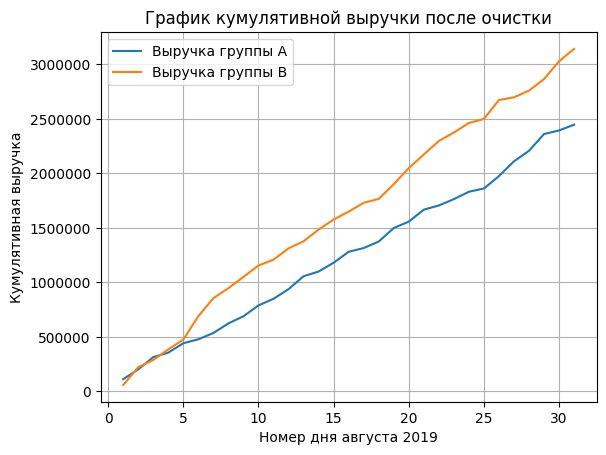

In [ ]:
plt.plot(ordersCummulative_cleaned.index+1,ordersCummulative_cleaned['revenue_a'],label='Выручка группы А')
plt.plot(ordersCummulative_cleaned.index+1,ordersCummulative_cleaned['revenue_b'], label='Выручка группы В')
plt.legend()
plt.ylabel('Кумулятивная выручка')
plt.xlabel('Номер дня августа 2019')
plt.ticklabel_format(style='plain')
plt.title('График кумулятивной выручки после очистки')
plt.grid()

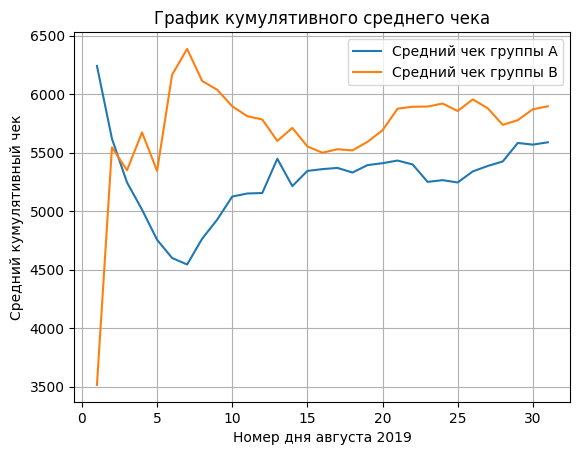

In [ ]:
plt.plot(ordersCummulative_cleaned.index+1,ordersCummulative_cleaned['revenue_a']/ordersCummulative_cleaned['transactionId_a'],label='Средний чек группы А')
plt.plot(ordersCummulative_cleaned.index+1,ordersCummulative_cleaned['revenue_b']/ordersCummulative_cleaned['transactionId_b'], label='Средний чек группы В')
plt.legend()
plt.ylabel('Средний кумулятивный чек')
plt.xlabel('Номер дня августа 2019')
plt.title('График кумулятивного среднего чека')
plt.grid();

Text(0.5, 1.0, 'График относительного изменения кумулятивного среднего чека группы B к группе А')

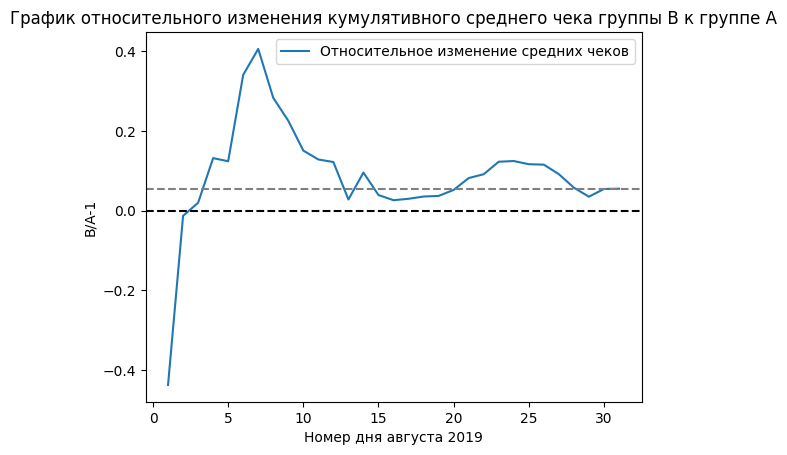

In [ ]:
plt.plot(ordersCummulative_cleaned.index+1,((ordersCummulative_cleaned['revenue_b']/ordersCummulative_cleaned['transactionId_b'])
         /(ordersCummulative_cleaned['revenue_a']/ordersCummulative_cleaned['transactionId_a'])-1),label='Относительное изменение средних чеков')
plt.axhline(y=0,linestyle='--', color='black')
plt.axhline(y=0.055,linestyle='--', color='grey')
plt.legend()
plt.ylabel('B/A-1')
plt.xlabel('Номер дня августа 2019')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе А')
plt.grid();

Как видно после удаления аномалий показатель относительного изменения кумулятивного среднего чека после 3 августа всегда выше 0.

**Благодоря графику и выводам выше в этом пункет, можно сделать вывод о состоятельности гипотезы:
**Остановим тест и зафиксируем победу группы B.**

**Вывод:**

**При сравнении кумулятивной выручки видно что группа В почти с начала немного вырывается вперед, но примерно с 18 числа темпа роста В по сравнения с А начинают разительно отличаться причем в сторону В, тогда как у А на проятжении всего периода почти одинаковый темп роста. Этот сверхбыстрый рост длится день-два - потом темпы роста В возвращаются на прежный уровень, а вот разрыву между средними кумулятивными выручками уже не вернутся на прежний уровень.**

**Относительные изменения по кумулятивной выручки за месяц между группами - на конец периода у В почти на 50% больше кумулятивной выручки чем у группы А. на 17% больше заказов и на 19% больше посещений у группы В, по сравнению с группой А.Можно сделать предположение, что группа B стала совершать больше покупок в среднем из-за того что стала чаще заходить.**

**При сравнении средних чеков отчетливее виден резкий рост этого показателя у группы В где-то 18 числа - тут может идти речь об аномальных значениях - кто-то совершил очень большую покупку - при этом только в одной группе. На лицо всплеск. Такие всплески могут исказить выводы о различии или схожести групп. После 19 числа у группы В средний кумультивный чек убывает и на 31 число разница между группами составляет около 29% в пользу В.**

**В начале расчетного периожа относительное изменения среднего чека меньше нуля, что говорит, что у группы он А больше среднего чека группы В, однако уже ко 2 дню резуьлтат координально меняется и почти постоянно (кроме отрезка времени примерно с 11 по 17 августа) средний кумулятивный чек группы B больше чем у группы А, то есть отностиельное значение больше нуля. Заканчиваются измерения среднего относительного кумулятвног чека на значении 0.28 в сторону В. Вышесказанное добовляет аргумент в пользу работоспособности гипотезы.**

**До 6 числа среднее количество кумулятивных покупок на посетителя в группе А больше чем в группе В, но после 6 числа наоборот в группе В среднее количество кумулятивных покупок на посетителя в группе В становится больше чем в группе А. В среднем на 33 посетителей приходится 1 покупка.**

**Относительное изменение среднего количества заказов на посетителя меньше нуля до 6 числа и больше нуля после 6 числа. На 31 день график вырванивается около значения 0.16 - 16%. Что подтверждает нашу гипотезу. Очевидно что такие показатели стабилизируются по прошествию времени.**

**С помощью точечного графика количества заказов по пользователям удалось выяснить, что 3 заказа у одного пользователя бывает очень редко.Не более 5% пользователей оформляли больше чем 1 заказов. И 1% пользователей заказывали более 2 раз. Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.**

**В основном заказы распологаются до 100.000 у.е. В выборке присутствует довольно много заказов после 26 тысяч у.е. (95 перцентиль) и до 54 тысяч у.е (99 перцентиль). Целесообразнее выбрать значение в 40.000 у.е. как верхнюю границу.**

**Cтатистическая значимость различий в среднем количестве заказов равна 0.011, что меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 16%.**

**Cтатистическая значимость различий в среднем чеке равно 0.83, что значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно ниже среднего чека группы A (на 22%).**

**Количество строк с id аномальных пользователей равно 30 - "отчистили" данные от этих "аномальных" пользователей. Cтатистическая значимость различий в среднем количестве заказов равно 0.0044, что значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «очищенных данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего количества заказов B к группе A равен 20.5%, что является значительным и подтверждает, что Наша гипотеза работает.**

**Cтатистическая значимость различий в среднем чеке равно 0.94, что значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Cредний чек группы B почти не отличается от среднего чека группы А (отличия около 5 процентов в пользу В).**

<hr style="border: 2px solid green;" />

## Общий комментарий
Я применил много приемов и дополнительно изучил некоторые зависимости

Общий итог по тесту: остановить и признать победу грВ - действительно все данные подтверждают это. На самом деле, даже при отсутствии изменений по среднему чеку, тест всё равно успешен. В рамках проекта мы не знаем, что было ключевой метрикой, но можно предположить, что в конечном итоге должна вырасти выручка. Расчет выручки можно представить так _Выручка = Средний чек * Среднее Число заказов_ , если 1 множитель не изменился, а другой вырос, то произведение тоже выросло